<a href="https://colab.research.google.com/github/namratesh/Machine-Learning/blob/master/4_Tensorflow_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
sess = tf.Session()

Starting with first operational f(x) = a.x in Tensorflow

In [0]:
a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype =tf.float32)


In [0]:
multiplication = tf.multiply(a, x_data)
loss = tf.square(tf.subtract(multiplication, 50.))


In [4]:
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [5]:
print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
  sess.run(train_step, feed_dict={x_data: x_val})
  a_val = sess.run(a)
  mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
  print(str(a_val) , ' * ' , str(x_val) ,  ' = ' , str(mult_output))

Optimizing a Multiplication Gate Output to 50.
7.0  *  5.0  =  35.0
8.5  *  5.0  =  42.5
9.25  *  5.0  =  46.25
9.625  *  5.0  =  48.125
9.8125  *  5.0  =  49.0625
9.90625  *  5.0  =  49.53125
9.953125  *  5.0  =  49.765625
9.9765625  *  5.0  =  49.882812
9.988281  *  5.0  =  49.941406
9.994141  *  5.0  =  49.970703


# Comparing sigmoid rectified linear unit

In [0]:
#importing libraries
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)


In [0]:
#declaring batch size, model variables, data and a placeholder
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape = [1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.01,500)
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)

In [0]:
#decaling sigmoid activation
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1)) 

#declaring Relu activation
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))


In [0]:
#defining loss function wiht L2 norm with value 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [0]:
#defining optimisation and initilizing variables
opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = opt.minimize(loss1)
train_step_relu = opt.minimize(loss2)
init = tf.initialize_all_variables()
sess.run(init)

In [0]:
#looping throug 750 itreation for both models
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(750):
  rand_indices = np.random.choice(len(x), size = batch_size)
  x_vals = np.transpose([x[rand_indices]])
  sess.run(train_step_sigmoid, feed_dict = {x_data: x_vals})
  sess.run(train_step_relu, feed_dict = {x_data: x_vals})
  loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
  loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
  activation_sigmoid.append(np.mean(sess.run(sigmoid_activation,feed_dict={x_data: x_vals})))
  activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))

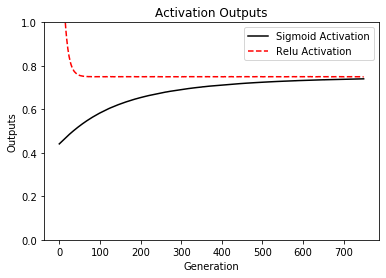

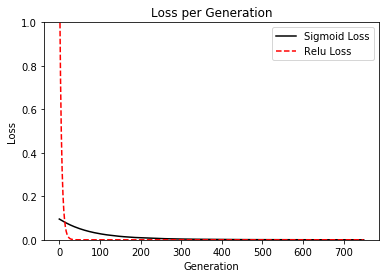

In [31]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()